### Introduction

This project will analyse data on Covid-19. The data will be gathered from multiple sources including a covid19 API, two csv files extracted from a 'Research and Data' website and through webscraping.

The objectives of this project are:

- Gather data from multiple sources
- Clean the data
- Merge the datasets into one database
- Query the database and extract information into Dataframes
- Plot the information
- Statistical analysis of the datasets

### Dataset 1

The first dataset on Covid-19 was extracted from a Research and Data website called www.ourworldindata.org. The steps involved were as follows:

- Save the csv file to local drive
- Read in the data from the csv file using Pandas and insert into a Dataframe
- Clean the data
- Create an SQL connection to a newly created database called covid19.db
- Create a table in the database called covid19
- Insert the values from the Dataframe into the covid19 table

In [15]:
# import pandas module
import pandas as pd

# load data from csv file into Pandas Dataframe
df1 = pd.read_csv(r'C:\Users\Rebecca\desktop\IntroProgProject-S00205102-RebeccaCole\covid-data.csv')

#### Clean Dataset 1

In [16]:
# show the first 5 rows of the dataframe
df1.head()

,code,country,date,total_case,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million
0,ABW,Aruba,13/03/2020,2,2,0,0,18.733,18.733,0.0,0.0
1,ABW,Aruba,20/03/2020,4,2,0,0,37.465,18.733,0.0,0.0
2,ABW,Aruba,24/03/2020,12,8,0,0,112.395,74.930,0.0,0.0
3,ABW,Aruba,25/03/2020,17,5,0,0,159.227,46.831,0.0,0.0
4,ABW,Aruba,26/03/2020,19,2,0,0,177.959,18.733,0.0,0.0


In [17]:
# check datatypes
df1.dtypes

code                         object
country                      object
date                         object
total_case                    int64
new_cases                     int64
total_deaths                  int64
new_deaths                    int64
total_cases_per_million     float64
new_cases_per_million       float64
total_deaths_per_million    float64
new_deaths_per_million      float64
dtype: object

In [18]:
# change datatype of date column to datetime
df1['date'] = df1['date'].astype('datetime64')
df1.head()

,code,country,date,total_case,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0


In [19]:
# replace na with zeros
df1 = df1.fillna(0)

# change datatypes to integers
df1[['total_cases_per_million', 'new_cases_per_million']] = df1[['total_cases_per_million', 'new_cases_per_million']].astype(int)
df1[['total_deaths_per_million', 'new_deaths_per_million']] = df1[['total_deaths_per_million', 'new_deaths_per_million']].astype(int)
df1.dtypes

code                                object
country                             object
date                        datetime64[ns]
total_case                           int64
new_cases                            int64
total_deaths                         int64
new_deaths                           int64
total_cases_per_million              int32
new_cases_per_million                int32
total_deaths_per_million             int32
new_deaths_per_million               int32
dtype: object

In [20]:
# remove the rows that have country of International and World as they are not relevant to this study
df1 = df1[df1.country != 'International']
df1 = df1[df1.country != 'World']

# print last 5 rows to check the delete has worked
df1.tail()

,code,country,date,total_case,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million
14103,ZWE,Zimbabwe,2020-04-26,31,2,4,0,2,0,0,0
14104,ZWE,Zimbabwe,2020-04-27,31,0,4,0,2,0,0,0
14105,ZWE,Zimbabwe,2020-04-28,32,1,4,0,2,0,0,0
14106,ZWE,Zimbabwe,2020-04-29,32,0,4,0,2,0,0,0
14107,ZWE,Zimbabwe,2020-04-30,40,8,4,0,2,0,0,0


In [21]:
# check that there are no null values
df1.isnull().sum()

code                        0
country                     0
date                        0
total_case                  0
new_cases                   0
total_deaths                0
new_deaths                  0
total_cases_per_million     0
new_cases_per_million       0
total_deaths_per_million    0
new_deaths_per_million      0
dtype: int64

### Dataset 1 to covid19 Database
SQLite3 was used to create a new table in the covid 19 database called 'covid19'. The values from the pandas dataframe (df1) were inserted into the newly created 'covid19' database table.

In [22]:
# import sqlite3 module 
import sqlite3 as sql

# create a SQL connection to an SQLite3 database
conn = sql.connect(r'C:\Users\Rebecca\desktop\IntroProgProject-S00205102-RebeccaCole\covid19.db')

# create a cursor
c = conn.cursor()

# create a new table called covid19
## c.execute("CREATE TABLE covid19 (code char(6) NOT NULL PRIMARY KEY, country, location, date, total_cases, new_cases, total_deaths, new_deaths, total_cases_per_million, new_cases_per_million, total_deaths_per_million, new_deaths_per_million);")

conn.commit()

# insert the values from the dataframe into the covid19 table
df1.to_sql('covid19', conn, if_exists='replace', index = False)

## c.execute("DROP TABLE covid19;")

### Dataset 2

The second dataset on Covid-19 was accessed by way of an API. This covid19 API was accessed from https://api.covid19api.com/summary. The steps involved were as follows:

- Made a GET request to retrieve the information from the API
- Response returned in JSOn format
- Convert JSON format to a Pandas Dataframe
- Return first 5 rows of Dataframe
- Clean the data
- Create an SQL connection to a newly created database called covid19.db
- Create a table in the database called recovered_persons
- Insert the values from the Dataframe into the recovered_persons table

In [24]:
import requests
import pandas as pd
import json

url = "https://api.covid19api.com/summary"

payload = {}
headers = {}

# make a GET request to the webserver for the data
response = requests.request("GET", url, headers=headers, data = payload)

# convert content to a string
response.encoding = 'utf-8'
response.text
json_response = response.json()

Countries = json_response['Countries']

# convert the json response to a pandas dataframe
df = pd.DataFrame(Countries)
df.head()

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
0,Afghanistan,AF,afghanistan,581,7653,5,178,49,850,2020-05-20T10:11:37Z
1,Albania,AL,albania,1,949,0,31,15,742,2020-05-20T10:11:37Z
2,Algeria,DZ,algeria,176,7377,6,561,121,3746,2020-05-20T10:11:37Z
3,Andorra,AD,andorra,0,761,0,51,4,628,2020-05-20T10:11:37Z
4,Angola,AO,angola,2,52,0,3,0,17,2020-05-20T10:11:37Z


#### Clean Dataset 2

In [25]:
# check the data types
df.dtypes

Country           object
CountryCode       object
Slug              object
NewConfirmed       int64
TotalConfirmed     int64
NewDeaths          int64
TotalDeaths        int64
NewRecovered       int64
TotalRecovered     int64
Date              object
dtype: object

In [26]:
# convert the date column from object datatype to datetime type
df['Date'] = df['Date'].astype('datetime64')

# display the first 5 rows
df.head()

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
0,Afghanistan,AF,afghanistan,581,7653,5,178,49,850,2020-05-20 10:11:37
1,Albania,AL,albania,1,949,0,31,15,742,2020-05-20 10:11:37
2,Algeria,DZ,algeria,176,7377,6,561,121,3746,2020-05-20 10:11:37
3,Andorra,AD,andorra,0,761,0,51,4,628,2020-05-20 10:11:37
4,Angola,AO,angola,2,52,0,3,0,17,2020-05-20 10:11:37


In [27]:
# check that the datatype of the date column has changed to datetime
df.dtypes

Country                   object
CountryCode               object
Slug                      object
NewConfirmed               int64
TotalConfirmed             int64
NewDeaths                  int64
TotalDeaths                int64
NewRecovered               int64
TotalRecovered             int64
Date              datetime64[ns]
dtype: object

In [29]:
# remove timestamp
df['Date'] = pd.to_datetime(df['Date']).dt.date

# display the first 5 rows to check timestamp has been removed
df.head()

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
0,Afghanistan,AF,afghanistan,581,7653,5,178,49,850,2020-05-20
1,Albania,AL,albania,1,949,0,31,15,742,2020-05-20
2,Algeria,DZ,algeria,176,7377,6,561,121,3746,2020-05-20
3,Andorra,AD,andorra,0,761,0,51,4,628,2020-05-20
4,Angola,AO,angola,2,52,0,3,0,17,2020-05-20


In [30]:
# check for null values
df.isnull().sum()

Country           0
CountryCode       0
Slug              0
NewConfirmed      0
TotalConfirmed    0
NewDeaths         0
TotalDeaths       0
NewRecovered      0
TotalRecovered    0
Date              0
dtype: int64

In [39]:
# drop the Slug column as this is not required
#df = df.drop(['Slug'], axis=1)
df.head()
#df.columns

,Country,CountryCode,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
0,Afghanistan,AF,581,7653,5,178,49,850,2020-05-20
1,Albania,AL,1,949,0,31,15,742,2020-05-20
2,Algeria,DZ,176,7377,6,561,121,3746,2020-05-20
3,Andorra,AD,0,761,0,51,4,628,2020-05-20
4,Angola,AO,2,52,0,3,0,17,2020-05-20


#### Dataset 2 to covid19 Database
SQLite3 was used to create a new table in the covid 19 database called 'recovered_persons'. The values from the pandas dataframe (df) were inserted into the newly created 'recovered_persons' database table.

In [41]:
# import sqlite3 module 
import sqlite3 as sql

# create a SQL connection to an SQLite3 database
conn = sql.connect(r'C:\Users\Rebecca\desktop\IntroProgProject-S00205102-RebeccaCole\covid19.db')

# create a cursor
c = conn.cursor()

# create a new table called recovered
c.execute("CREATE TABLE recovered_persons (Country, CountryCode char(6) NOT NULL PRIMARY KEY, NewConfirmed, TotalConfirmed, NewDeaths, TotalDeaths, NewRecovered, TotalRecovered);")

conn.commit()

# insert the values from the dataframe into the 'recovered' table
df.to_sql('recovered_persons', conn, if_exists='replace', index = False)

##c.execute("DROP TABLE recovered_persons;")

### Dataset 3

The third dataset was extracted by way of webscraping from the following webage: https://en.wikipedia.org/wiki/List_of_European_countries_by_population

The below lines of code were used to extract a table of European Populations from the webpage. The Python library Beautiful Soup was used to scrape the HTML from the webpage, find the required table and Python was used to retrieve the content from the table and insert into a Pandas Dataframe.

In [42]:
# import urllib library to open url
import urllib.request

In [43]:
# set variable url as the webpage that needs to be scraped
url = "https://en.wikipedia.org/wiki/List_of_European_countries_by_population"

In [44]:
# open the url and set the HTML to a page variable
page = urllib.request.urlopen(url)

In [45]:
# import BeautifulSoup library
from bs4 import BeautifulSoup as bs

In [46]:
# parse the HTML from url variable into new variable soup
soup = bs(page, "lxml")

In [47]:
# use the BeautifulSoup prettify() function to view the HTML
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of European countries by population - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XsS8WApAIC4AAEyZc@UAAAAS","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_European_countries_by_population","wgTitle":"List of European countries by population","wgCurRevisionId":957702620,"wgRevisionId":957702620,"wgArticleId":28393374,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Demographics of Europe","Lists of countries in 

I am looking to extract the data from the table into a Pandas Dataframe. From loooking at the above HTML the table has a class identifier of "sortable wikitable" made up of tr, th and td tags.

In [48]:
# return the title of the webpage
soup.title

<title>List of European countries by population - Wikipedia</title>

In [49]:
# find chosen table which has a class identifier of "sortable wikitable"
table = soup.find('table', class_='sortable wikitable')
table

<table class="sortable wikitable" style="text-align:right">
<tbody><tr valign="bottomalba">
<th rowspan="2">Rank<br/><sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[Note 1]</a></sup>
</th>
<th rowspan="2">Country<br/>(or dependent territory)
</th>
<th rowspan="2">UN<br/><abbr title="Today">estimate</abbr>
</th>
<th colspan="2">National statistic
</th>
<th rowspan="2">Regional<br/>grouping
</th>
<th rowspan="2">Source
</th></tr>
<tr>
<th>Estimate
</th>
<th>Date
</th></tr>
<tr style="background:#b3ffb3">
<td>1</td>
<td align="left"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/en/thumb/f/f3/Flag_of_Russia.svg/23px-Flag_of_Russia.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/f/f3/Flag_of_Russia.svg/35px-Flag_of_Russia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/f/f3/Flag_of_Russia.svg/45px-Flag_of_Russia.svg.png 2x" width="23"/></

In [50]:
# set up empty lists to store the contents of the table
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
G=[]

# loop through each row of the table and retrieve contents from <td> tags and insert into empty list
for row in table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==7:
        A.append(cells[0].find(text=True))
        clnk=cells[1].findAll('a')
        B.append(clnk[0].contents[0])
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
        E.append(cells[4].find(text=True))
        F.append(cells[5].find(text=True))
        G.append(cells[6].find(text=True))

In [51]:
# import pandas as pd
import pandas as pd

# create a pandas dataframe
df2 = pd.DataFrame(A,columns=['Rank'])
df2['Country (or dependent territory)']=B
df2['UN Estimate']=C
df2['Estimate']=D
df2['Date']=E
df2['Regional grouping']=F
df2['Source']=G
df2.head()

,Rank,Country (or dependent territory),UN Estimate,Estimate,Date,Regional grouping,Source
0,1,Russia,"145,996,764","146,877,088",1 Jan 2018,EAEU,National Estimate
1,2,Germany,"83,871,995","82,887,000",30 Jun 2018,EU,National estimate
2,3,Turkey,"84,422,510","83,154,997",4 Feb 2020,None,National estimate
3,4,France,"65,255,278","67,076,000",1 Mar 2020,EU,Monthly national estimate
4,5,United Kingdom,"67,881,733","66,435,550",30 Jun 2017,None,National annual estimate


#### Clean Dataset 3

In [52]:
# drop the rank, regional grouping and source columns as they are not required
df3 = df2.drop(['Rank', 'Regional grouping', 'Source'], axis=1)

# rename the 'Country (or dependent territory)' column to Country
df3.rename(columns={'Country (or dependent territory)':'Country'}, inplace=True)

# Need to remove commas from the values in columns 'UN Estimate' and 'Estimate'
cols = ['UN Estimate', 'Estimate']

# use df.replace() to remove commas from 'cols' list - specifying each char and it's replacement
df3[cols] = df3[cols].replace({',': '', '""': ''}, regex=True)

df3.head()

,Country,UN Estimate,Estimate,Date
0,Russia,145996764,146877088,1 Jan 2018
1,Germany,83871995,82887000,30 Jun 2018
2,Turkey,84422510,83154997,4 Feb 2020
3,France,65255278,67076000,1 Mar 2020
4,United Kingdom,67881733,66435550,30 Jun 2017


In [53]:
# check the datatypes of each column
df3.dtypes

Country        object
UN Estimate    object
Estimate       object
Date           object
dtype: object

In [54]:
# change 'UN Estimate' and 'Estimate' to numeric datatypes
df3['UN Estimate'] = df3['UN Estimate'].apply(pd.to_numeric)
df3['Estimate'] = df3['Estimate'].apply(pd.to_numeric)
df3.dtypes

Country         object
UN Estimate    float64
Estimate         int64
Date            object
dtype: object

In [55]:
# change datatype of date to datetime
df3['Date'] = df3['Date'].astype('datetime64')
df3.head()

,Country,UN Estimate,Estimate,Date
0,Russia,145996764.0,146877088,2018-01-01
1,Germany,83871995.0,82887000,2018-06-30
2,Turkey,84422510.0,83154997,2020-02-04
3,France,65255278.0,67076000,2020-03-01
4,United Kingdom,67881733.0,66435550,2017-06-30


In [56]:
# check datatype of date to ensure it has changed to datetime
df3.dtypes

Country                object
UN Estimate           float64
Estimate                int64
Date           datetime64[ns]
dtype: object

In [57]:
# replace na with zeros
df3 = df3.fillna(0)

# change datatype of 'UN Estimate' to integer
df3['UN Estimate'] = df3['UN Estimate'].astype(int)
df3.dtypes

Country                object
UN Estimate             int32
Estimate                int64
Date           datetime64[ns]
dtype: object

In [59]:
# remove timestamp
df3['Date'] = pd.to_datetime(df3['Date']).dt.date
df3.head()

,Country,UN Estimate,Estimate,Date
0,Russia,145996764,146877088,2018-01-01
1,Germany,83871995,82887000,2018-06-30
2,Turkey,84422510,83154997,2020-02-04
3,France,65255278,67076000,2020-03-01
4,United Kingdom,67881733,66435550,2017-06-30


In [60]:
# check for null values
df3.isnull().sum()

Country        0
UN Estimate    0
Estimate       0
Date           0
dtype: int64

#### Dataset 3 to covid19 Database
SQLite3 was used to create a new table in the covid 19 database called 'european_populations'. The values from the pandas dataframe (df3) were inserted into the newly created 'european_populations' database table.

In [62]:
# import sqlite3 module 
import sqlite3 as sql

# create a SQL connection to an SQLite3 database
conn = sql.connect(r'C:\Users\Rebecca\desktop\IntroProgProject-S00205102-RebeccaCole\covid19.db')

# create a cursor
c = conn.cursor()

# create a new table called population
#c.execute("CREATE TABLE european_populations (Country, UN Estimate, Estimate, Date);")

conn.commit()

# insert the values from the dataframe into the 'recovered' table
df3.to_sql('european_populations', conn, if_exists='replace', index = False)

### Dataset 4
The final dataset on Covid-19 was extracted from a Research and Data website called www.ourworldindata.org. This dataset provides information on the cumulative number of tests per 1000 for each country. The steps involved were as follows:

- Save the csv file to local drive
- Read in the data from the csv file using Pandas and insert into a Dataframe
- Clean the data
- Create an SQL connection to a newly created database called covid19.db
- Create a table in the database called covid_tests
- Insert the values from the Dataframe into the covid_tests table

In [64]:
# import pandas module
import pandas as pd

# load data from csv file into Pandas Dataframe
df10 = pd.read_csv(r'C:\Users\Rebecca\desktop\IntroProgProject-S00205102-RebeccaCole\covid-tests.csv')
df10.head()

,Entity,Code,Date,Tests
0,Argentina,ARG,"Apr 8, 2020",0.295
1,Argentina,ARG,"Apr 9, 2020",0.329
2,Argentina,ARG,"Apr 10, 2020",0.362
3,Argentina,ARG,"Apr 11, 2020",0.399
4,Argentina,ARG,"Apr 13, 2020",0.437


#### Clean Dataset 4

In [68]:
# rename the 'Entity' column to Country
df10.rename(columns={'Entity':'Country'}, inplace=True)

In [69]:
# replace na with zeros
df10 = df10.fillna(0)

# change datatype of date to datetime
df10['Date'] = df10['Date'].astype('datetime64')

# check the datatypes
df10.dtypes

Country            object
Code               object
Date       datetime64[ns]
Tests             float64
dtype: object

In [70]:
# check for null values
df3.isnull().sum()

Country        0
UN Estimate    0
Estimate       0
Date           0
dtype: int64

### Dataset 4 to covid19 Database
SQLite3 was used to create a new table in the covid 19 database called 'covid_tests'. The values from the pandas dataframe (df10) were inserted into the newly created 'covid_tests' database table.

In [71]:
# import sqlite3 module 
import sqlite3 as sql

# create a SQL connection to an SQLite3 database
conn = sql.connect(r'C:\Users\Rebecca\desktop\IntroProgProject-S00205102-RebeccaCole\covid19.db')

# create a cursor
c = conn.cursor()

# create a new table called covid_tests
c.execute("CREATE TABLE covid_tests (Country, Code char(6) NOT NULL PRIMARY KEY, Date, Tests);")

conn.commit()

# insert the values from the dataframe into the covid_tests table
df10.to_sql('covid_tests', conn, if_exists='replace', index = False)

##c.execute("DROP TABLE covid_tests;")

### Check the Database
Checks will now be performed to ensure the data from the dataframes have been correctly inserted into the tables in the covid19 database. Four tables were initially created in the database named 'covid19', 'recovered_persons', 'covid_tests' and 'european_populations'. A fifth table called 'recovered_populations' was created further along in the project.

In [72]:
# check the table names and print the list
c.execute("SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';")
table_names = c.fetchall()
for r in table_names:
    print(r)

('recovered_populations',)
('covid19',)
('recovered_persons',)
('european_populations',)
('covid_tests',)


In [73]:
# check the names of the columns in the covid19 table
for column in c.execute("SELECT * FROM covid_tests").description:
    print(column)

('Country', None, None, None, None, None, None)
('Code', None, None, None, None, None, None)
('Date', None, None, None, None, None, None)
('Tests', None, None, None, None, None, None)


In [74]:
for row in c.execute('SELECT * FROM covid_tests;'):
    print(row)

('Argentina', 'ARG', '2020-04-08 00:00:00', 0.295)
('Argentina', 'ARG', '2020-04-09 00:00:00', 0.32899999999999996)
('Argentina', 'ARG', '2020-04-10 00:00:00', 0.36200000000000004)
('Argentina', 'ARG', '2020-04-11 00:00:00', 0.39899999999999997)
('Argentina', 'ARG', '2020-04-13 00:00:00', 0.43700000000000006)
('Argentina', 'ARG', '2020-04-14 00:00:00', 0.505)
('Argentina', 'ARG', '2020-04-15 00:00:00', 0.539)
('Argentina', 'ARG', '2020-04-16 00:00:00', 0.585)
('Argentina', 'ARG', '2020-04-17 00:00:00', 0.634)
('Argentina', 'ARG', '2020-04-18 00:00:00', 0.685)
('Argentina', 'ARG', '2020-04-19 00:00:00', 0.7240000000000001)
('Argentina', 'ARG', '2020-04-20 00:00:00', 0.765)
('Argentina', 'ARG', '2020-04-21 00:00:00', 0.81)
('Argentina', 'ARG', '2020-04-22 00:00:00', 0.868)
('Argentina', 'ARG', '2020-04-23 00:00:00', 0.925)
('Argentina', 'ARG', '2020-04-24 00:00:00', 0.988)
('Argentina', 'ARG', '2020-04-25 00:00:00', 1.0490000000000002)
('Argentina', 'ARG', '2020-04-26 00:00:00', 1.104)
(

('Hungary', 'HUN', '2020-04-05 00:00:00', 2.2)
('Hungary', 'HUN', '2020-04-06 00:00:00', 2.307)
('Hungary', 'HUN', '2020-04-07 00:00:00', 2.458)
('Hungary', 'HUN', '2020-04-08 00:00:00', 2.665)
('Hungary', 'HUN', '2020-04-09 00:00:00', 2.88)
('Hungary', 'HUN', '2020-04-10 00:00:00', 3.1)
('Hungary', 'HUN', '2020-04-11 00:00:00', 3.3080000000000003)
('Hungary', 'HUN', '2020-04-12 00:00:00', 3.471)
('Hungary', 'HUN', '2020-04-13 00:00:00', 3.6039999999999996)
('Hungary', 'HUN', '2020-04-14 00:00:00', 3.708)
('Hungary', 'HUN', '2020-04-15 00:00:00', 3.864)
('Hungary', 'HUN', '2020-04-16 00:00:00', 3.984)
('Hungary', 'HUN', '2020-04-17 00:00:00', 4.305)
('Hungary', 'HUN', '2020-04-18 00:00:00', 4.544)
('Hungary', 'HUN', '2020-04-19 00:00:00', 4.798)
('Hungary', 'HUN', '2020-04-20 00:00:00', 4.975)
('Hungary', 'HUN', '2020-04-21 00:00:00', 5.181)
('Hungary', 'HUN', '2020-04-22 00:00:00', 5.455)
('Hungary', 'HUN', '2020-04-23 00:00:00', 5.734)
('Hungary', 'HUN', '2020-04-24 00:00:00', 6.03)


('Malaysia', 'MYS', '2020-05-07 00:00:00', 7.138)
('Malaysia', 'MYS', '2020-05-08 00:00:00', 7.404)
('Malaysia', 'MYS', '2020-05-10 00:00:00', 7.938)
('Malaysia', 'MYS', '2020-05-11 00:00:00', 8.22)
('Malaysia', 'MYS', '2020-05-16 00:00:00', 13.413)
('Mexico', 'MEX', '2020-01-01 00:00:00', 0.0)
('Mexico', 'MEX', '2020-01-02 00:00:00', 0.0)
('Mexico', 'MEX', '2020-01-03 00:00:00', 0.0)
('Mexico', 'MEX', '2020-01-04 00:00:00', 0.0)
('Mexico', 'MEX', '2020-01-05 00:00:00', 0.0)
('Mexico', 'MEX', '2020-01-06 00:00:00', 0.001)
('Mexico', 'MEX', '2020-01-07 00:00:00', 0.001)
('Mexico', 'MEX', '2020-01-08 00:00:00', 0.001)
('Mexico', 'MEX', '2020-01-09 00:00:00', 0.001)
('Mexico', 'MEX', '2020-01-10 00:00:00', 0.002)
('Mexico', 'MEX', '2020-01-11 00:00:00', 0.002)
('Mexico', 'MEX', '2020-01-12 00:00:00', 0.002)
('Mexico', 'MEX', '2020-01-13 00:00:00', 0.002)
('Mexico', 'MEX', '2020-01-14 00:00:00', 0.003)
('Mexico', 'MEX', '2020-01-15 00:00:00', 0.003)
('Mexico', 'MEX', '2020-01-16 00:00:00',

('Turkey', 'TUR', '2020-05-01 00:00:00', 12.747)
('Turkey', 'TUR', '2020-05-03 00:00:00', 13.462)
('Turkey', 'TUR', '2020-05-04 00:00:00', 13.886)
('Turkey', 'TUR', '2020-05-05 00:00:00', 14.280999999999999)
('Turkey', 'TUR', '2020-05-06 00:00:00', 14.64)
('Turkey', 'TUR', '2020-05-07 00:00:00', 15.0)
('Turkey', 'TUR', '2020-05-08 00:00:00', 15.4)
('Turkey', 'TUR', '2020-05-09 00:00:00', 15.822000000000001)
('Turkey', 'TUR', '2020-05-10 00:00:00', 16.250999999999998)
('Turkey', 'TUR', '2020-05-11 00:00:00', 16.639)
('Turkey', 'TUR', '2020-05-12 00:00:00', 17.082)
('Turkey', 'TUR', '2020-05-13 00:00:00', 17.477)
('Turkey', 'TUR', '2020-05-14 00:00:00', 17.89)
('Turkey', 'TUR', '2020-05-15 00:00:00', 18.347)
('Turkey', 'TUR', '2020-05-16 00:00:00', 18.848)
('Uganda', 'UGA', '2020-04-06 00:00:00', 0.069)
('Uganda', 'UGA', '2020-04-07 00:00:00', 0.07200000000000001)
('Uganda', 'UGA', '2020-04-08 00:00:00', 0.077)
('Uganda', 'UGA', '2020-04-09 00:00:00', 0.084)
('Uganda', 'UGA', '2020-04-10

In [75]:
# check the names of the columns in the covid19 table
for column in c.execute("SELECT * FROM covid19").description:
    print(column)

('code', None, None, None, None, None, None)
('country', None, None, None, None, None, None)
('date', None, None, None, None, None, None)
('total_case', None, None, None, None, None, None)
('new_cases', None, None, None, None, None, None)
('total_deaths', None, None, None, None, None, None)
('new_deaths', None, None, None, None, None, None)
('total_cases_per_million', None, None, None, None, None, None)
('new_cases_per_million', None, None, None, None, None, None)
('total_deaths_per_million', None, None, None, None, None, None)
('new_deaths_per_million', None, None, None, None, None, None)


In [77]:
for row in c.execute('SELECT * FROM covid19;'):
    print(row)

('ABW', 'Aruba', '2020-03-13 00:00:00', 2, 2, 0, 0, 18, 18, 0, 0)
('ABW', 'Aruba', '2020-03-20 00:00:00', 4, 2, 0, 0, 37, 18, 0, 0)
('ABW', 'Aruba', '2020-03-24 00:00:00', 12, 8, 0, 0, 112, 74, 0, 0)
('ABW', 'Aruba', '2020-03-25 00:00:00', 17, 5, 0, 0, 159, 46, 0, 0)
('ABW', 'Aruba', '2020-03-26 00:00:00', 19, 2, 0, 0, 177, 18, 0, 0)
('ABW', 'Aruba', '2020-03-27 00:00:00', 28, 9, 0, 0, 262, 84, 0, 0)
('ABW', 'Aruba', '2020-03-28 00:00:00', 28, 0, 0, 0, 262, 0, 0, 0)
('ABW', 'Aruba', '2020-03-29 00:00:00', 28, 0, 0, 0, 262, 0, 0, 0)
('ABW', 'Aruba', '2020-03-30 00:00:00', 50, 22, 0, 0, 468, 206, 0, 0)
('ABW', 'Aruba', '2020-01-04 00:00:00', 55, 5, 0, 0, 515, 46, 0, 0)
('ABW', 'Aruba', '2020-02-04 00:00:00', 55, 0, 0, 0, 515, 0, 0, 0)
('ABW', 'Aruba', '2020-03-04 00:00:00', 60, 5, 0, 0, 561, 46, 0, 0)
('ABW', 'Aruba', '2020-04-04 00:00:00', 62, 2, 0, 0, 580, 18, 0, 0)
('ABW', 'Aruba', '2020-05-04 00:00:00', 64, 2, 0, 0, 599, 18, 0, 0)
('ABW', 'Aruba', '2020-06-04 00:00:00', 64, 0, 0, 0, 

('BHR', 'Bahrain', '2020-02-28 00:00:00', 33, 0, 0, 0, 19, 0, 0, 0)
('BHR', 'Bahrain', '2020-02-29 00:00:00', 38, 5, 0, 0, 22, 2, 0, 0)
('BHR', 'Bahrain', '2020-01-03 00:00:00', 41, 3, 0, 0, 24, 1, 0, 0)
('BHR', 'Bahrain', '2020-02-03 00:00:00', 47, 6, 0, 0, 27, 3, 0, 0)
('BHR', 'Bahrain', '2020-04-03 00:00:00', 49, 2, 0, 0, 28, 1, 0, 0)
('BHR', 'Bahrain', '2020-05-03 00:00:00', 52, 3, 0, 0, 30, 1, 0, 0)
('BHR', 'Bahrain', '2020-06-03 00:00:00', 52, 0, 0, 0, 30, 0, 0, 0)
('BHR', 'Bahrain', '2020-07-03 00:00:00', 56, 4, 0, 0, 32, 2, 0, 0)
('BHR', 'Bahrain', '2020-08-03 00:00:00', 63, 7, 0, 0, 37, 4, 0, 0)
('BHR', 'Bahrain', '2020-09-03 00:00:00', 79, 16, 0, 0, 46, 9, 0, 0)
('BHR', 'Bahrain', '2020-10-03 00:00:00', 109, 30, 0, 0, 64, 17, 0, 0)
('BHR', 'Bahrain', '2020-11-03 00:00:00', 110, 1, 0, 0, 64, 0, 0, 0)
('BHR', 'Bahrain', '2020-12-03 00:00:00', 162, 52, 0, 0, 95, 30, 0, 0)
('BHR', 'Bahrain', '2020-03-13 00:00:00', 162, 0, 0, 0, 95, 0, 0, 0)
('BHR', 'Bahrain', '2020-03-14 00:00:00

('CRI', 'Costa Rica', '2020-04-23 00:00:00', 681, 12, 6, 0, 133, 2, 1, 0)
('CRI', 'Costa Rica', '2020-04-24 00:00:00', 687, 6, 6, 0, 134, 1, 1, 0)
('CRI', 'Costa Rica', '2020-04-25 00:00:00', 687, 0, 6, 0, 134, 0, 1, 0)
('CRI', 'Costa Rica', '2020-04-26 00:00:00', 693, 6, 6, 0, 136, 1, 1, 0)
('CRI', 'Costa Rica', '2020-04-27 00:00:00', 695, 2, 6, 0, 136, 0, 1, 0)
('CRI', 'Costa Rica', '2020-04-28 00:00:00', 697, 2, 6, 0, 136, 0, 1, 0)
('CRI', 'Costa Rica', '2020-04-29 00:00:00', 705, 8, 6, 0, 138, 1, 1, 0)
('CRI', 'Costa Rica', '2020-04-30 00:00:00', 713, 8, 6, 0, 139, 1, 1, 0)
('CUB', 'Cuba', '2020-12-03 00:00:00', 3, 3, 0, 0, 0, 0, 0, 0)
('CUB', 'Cuba', '2020-03-14 00:00:00', 4, 1, 0, 0, 0, 0, 0, 0)
('CUB', 'Cuba', '2020-03-15 00:00:00', 4, 0, 0, 0, 0, 0, 0, 0)
('CUB', 'Cuba', '2020-03-18 00:00:00', 7, 3, 0, 0, 0, 0, 0, 0)
('CUB', 'Cuba', '2020-03-19 00:00:00', 11, 4, 1, 1, 0, 0, 0, 0)
('CUB', 'Cuba', '2020-03-20 00:00:00', 16, 5, 1, 0, 1, 0, 0, 0)
('CUB', 'Cuba', '2020-03-21 00:00:0

('FIN', 'Finland', '2020-05-03 00:00:00', 0, 0, 0, 0, 0, 0, 0, 0)
('FIN', 'Finland', '2020-06-03 00:00:00', 12, 5, 0, 0, 2, 0, 0, 0)
('FIN', 'Finland', '2020-07-03 00:00:00', 19, 7, 0, 0, 3, 1, 0, 0)
('FIN', 'Finland', '2020-08-03 00:00:00', 0, 0, 0, 0, 0, 0, 0, 0)
('FIN', 'Finland', '2020-09-03 00:00:00', 30, 11, 0, 0, 5, 1, 0, 0)
('FIN', 'Finland', '2020-10-03 00:00:00', 40, 10, 0, 0, 7, 1, 0, 0)
('FIN', 'Finland', '2020-11-03 00:00:00', 0, 0, 0, 0, 0, 0, 0, 0)
('FIN', 'Finland', '2020-12-03 00:00:00', 59, 19, 0, 0, 10, 3, 0, 0)
('FIN', 'Finland', '2020-03-13 00:00:00', 155, 96, 0, 0, 27, 17, 0, 0)
('FIN', 'Finland', '2020-03-14 00:00:00', 183, 28, 0, 0, 33, 5, 0, 0)
('FIN', 'Finland', '2020-03-15 00:00:00', 210, 27, 0, 0, 37, 4, 0, 0)
('FIN', 'Finland', '2020-03-16 00:00:00', 267, 57, 0, 0, 48, 10, 0, 0)
('FIN', 'Finland', '2020-03-17 00:00:00', 272, 5, 0, 0, 49, 0, 0, 0)
('FIN', 'Finland', '2020-03-18 00:00:00', 319, 47, 0, 0, 57, 8, 0, 0)
('FIN', 'Finland', '2020-03-19 00:00:00', 

('GRD', 'Grenada', '2020-01-04 00:00:00', 9, 0, 0, 0, 79, 0, 0, 0)
('GRD', 'Grenada', '2020-02-04 00:00:00', 10, 1, 0, 0, 88, 8, 0, 0)
('GRD', 'Grenada', '2020-03-04 00:00:00', 10, 0, 0, 0, 88, 0, 0, 0)
('GRD', 'Grenada', '2020-04-04 00:00:00', 12, 2, 0, 0, 106, 17, 0, 0)
('GRD', 'Grenada', '2020-05-04 00:00:00', 12, 0, 0, 0, 106, 0, 0, 0)
('GRD', 'Grenada', '2020-06-04 00:00:00', 12, 0, 0, 0, 106, 0, 0, 0)
('GRD', 'Grenada', '2020-07-04 00:00:00', 12, 0, 0, 0, 106, 0, 0, 0)
('GRD', 'Grenada', '2020-08-04 00:00:00', 12, 0, 0, 0, 106, 0, 0, 0)
('GRD', 'Grenada', '2020-09-04 00:00:00', 12, 0, 0, 0, 106, 0, 0, 0)
('GRD', 'Grenada', '2020-10-04 00:00:00', 12, 0, 0, 0, 106, 0, 0, 0)
('GRD', 'Grenada', '2020-11-04 00:00:00', 14, 2, 0, 0, 124, 17, 0, 0)
('GRD', 'Grenada', '2020-12-04 00:00:00', 14, 0, 0, 0, 124, 0, 0, 0)
('GRD', 'Grenada', '2020-04-13 00:00:00', 14, 0, 0, 0, 124, 0, 0, 0)
('GRD', 'Grenada', '2020-04-14 00:00:00', 14, 0, 0, 0, 124, 0, 0, 0)
('GRD', 'Grenada', '2020-04-15 00:00

('ITA', 'Italy', '2020-04-28 00:00:00', 199414, 1739, 26977, 333, 3298, 28, 446, 5)
('ITA', 'Italy', '2020-04-29 00:00:00', 201505, 2091, 27359, 382, 3332, 34, 452, 6)
('ITA', 'Italy', '2020-04-30 00:00:00', 203591, 2086, 27682, 323, 3367, 34, 457, 5)
('JAM', 'Jamaica', '2020-12-03 00:00:00', 2, 2, 0, 0, 0, 0, 0, 0)
('JAM', 'Jamaica', '2020-03-13 00:00:00', 6, 4, 0, 0, 2, 1, 0, 0)
('JAM', 'Jamaica', '2020-03-14 00:00:00', 8, 2, 0, 0, 2, 0, 0, 0)
('JAM', 'Jamaica', '2020-03-16 00:00:00', 10, 2, 0, 0, 3, 0, 0, 0)
('JAM', 'Jamaica', '2020-03-17 00:00:00', 10, 0, 0, 0, 3, 0, 0, 0)
('JAM', 'Jamaica', '2020-03-18 00:00:00', 13, 3, 0, 0, 4, 1, 0, 0)
('JAM', 'Jamaica', '2020-03-19 00:00:00', 15, 2, 0, 0, 5, 0, 0, 0)
('JAM', 'Jamaica', '2020-03-20 00:00:00', 16, 1, 0, 0, 5, 0, 0, 0)
('JAM', 'Jamaica', '2020-03-21 00:00:00', 19, 3, 0, 0, 6, 1, 0, 0)
('JAM', 'Jamaica', '2020-03-22 00:00:00', 19, 0, 0, 0, 6, 0, 0, 0)
('JAM', 'Jamaica', '2020-03-23 00:00:00', 19, 0, 0, 0, 6, 0, 0, 0)
('JAM', 'Jamai

('LVA', 'Latvia', '2020-03-26 00:00:00', 221, 24, 0, 0, 117, 12, 0, 0)
('LVA', 'Latvia', '2020-03-27 00:00:00', 244, 23, 0, 0, 129, 12, 0, 0)
('LVA', 'Latvia', '2020-03-28 00:00:00', 280, 36, 0, 0, 148, 19, 0, 0)
('LVA', 'Latvia', '2020-03-29 00:00:00', 305, 25, 0, 0, 161, 13, 0, 0)
('LVA', 'Latvia', '2020-03-30 00:00:00', 376, 71, 0, 0, 199, 37, 0, 0)
('LVA', 'Latvia', '2020-03-31 00:00:00', 376, 0, 0, 0, 199, 0, 0, 0)
('LVA', 'Latvia', '2020-01-04 00:00:00', 398, 22, 0, 0, 211, 11, 0, 0)
('LVA', 'Latvia', '2020-02-04 00:00:00', 446, 48, 0, 0, 236, 25, 0, 0)
('LVA', 'Latvia', '2020-03-04 00:00:00', 458, 12, 0, 0, 242, 6, 0, 0)
('LVA', 'Latvia', '2020-04-04 00:00:00', 493, 35, 1, 1, 261, 18, 0, 0)
('LVA', 'Latvia', '2020-05-04 00:00:00', 509, 16, 1, 0, 269, 8, 0, 0)
('LVA', 'Latvia', '2020-06-04 00:00:00', 533, 24, 1, 0, 282, 12, 0, 0)
('LVA', 'Latvia', '2020-07-04 00:00:00', 542, 9, 1, 0, 287, 4, 0, 0)
('LVA', 'Latvia', '2020-08-04 00:00:00', 548, 6, 2, 1, 290, 3, 1, 0)
('LVA', 'Latvi

('NLD', 'Netherlands', '2020-06-03 00:00:00', 82, 44, 0, 0, 4, 2, 0, 0)
('NLD', 'Netherlands', '2020-07-03 00:00:00', 128, 46, 1, 1, 7, 2, 0, 0)
('NLD', 'Netherlands', '2020-08-03 00:00:00', 188, 60, 1, 0, 10, 3, 0, 0)
('NLD', 'Netherlands', '2020-09-03 00:00:00', 265, 77, 3, 2, 15, 4, 0, 0)
('NLD', 'Netherlands', '2020-10-03 00:00:00', 321, 56, 3, 0, 18, 3, 0, 0)
('NLD', 'Netherlands', '2020-11-03 00:00:00', 382, 61, 4, 1, 22, 3, 0, 0)
('NLD', 'Netherlands', '2020-12-03 00:00:00', 503, 121, 5, 1, 29, 7, 0, 0)
('NLD', 'Netherlands', '2020-03-13 00:00:00', 614, 111, 5, 0, 35, 6, 0, 0)
('NLD', 'Netherlands', '2020-03-14 00:00:00', 804, 190, 5, 0, 46, 11, 0, 0)
('NLD', 'Netherlands', '2020-03-15 00:00:00', 959, 155, 12, 7, 55, 9, 0, 0)
('NLD', 'Netherlands', '2020-03-16 00:00:00', 1135, 176, 20, 8, 66, 10, 1, 0)
('NLD', 'Netherlands', '2020-03-17 00:00:00', 1413, 278, 24, 4, 82, 16, 1, 0)
('NLD', 'Netherlands', '2020-03-18 00:00:00', 1705, 292, 43, 19, 99, 17, 2, 1)
('NLD', 'Netherlands',

('ROU', 'Romania', '2020-04-27 00:00:00', 11036, 401, 608, 33, 573, 20, 31, 1)
('ROU', 'Romania', '2020-04-28 00:00:00', 11339, 303, 631, 23, 589, 15, 32, 1)
('ROU', 'Romania', '2020-04-29 00:00:00', 11616, 277, 650, 19, 603, 14, 33, 0)
('ROU', 'Romania', '2020-04-30 00:00:00', 11978, 362, 675, 25, 622, 18, 35, 1)
('RUS', 'Russia', '2019-12-31 00:00:00', 0, 0, 0, 0, 0, 0, 0, 0)
('RUS', 'Russia', '2020-01-01 00:00:00', 0, 0, 0, 0, 0, 0, 0, 0)
('RUS', 'Russia', '2020-02-01 00:00:00', 0, 0, 0, 0, 0, 0, 0, 0)
('RUS', 'Russia', '2020-03-01 00:00:00', 0, 0, 0, 0, 0, 0, 0, 0)
('RUS', 'Russia', '2020-04-01 00:00:00', 0, 0, 0, 0, 0, 0, 0, 0)
('RUS', 'Russia', '2020-05-01 00:00:00', 0, 0, 0, 0, 0, 0, 0, 0)
('RUS', 'Russia', '2020-06-01 00:00:00', 0, 0, 0, 0, 0, 0, 0, 0)
('RUS', 'Russia', '2020-07-01 00:00:00', 0, 0, 0, 0, 0, 0, 0, 0)
('RUS', 'Russia', '2020-08-01 00:00:00', 0, 0, 0, 0, 0, 0, 0, 0)
('RUS', 'Russia', '2020-09-01 00:00:00', 0, 0, 0, 0, 0, 0, 0, 0)
('RUS', 'Russia', '2020-10-01 00:0

('TCA', 'Turks and Caicos Islands', '2020-03-25 00:00:00', 1, 1, 0, 0, 25, 25, 0, 0)
('TCA', 'Turks and Caicos Islands', '2020-03-26 00:00:00', 1, 0, 0, 0, 25, 0, 0, 0)
('TCA', 'Turks and Caicos Islands', '2020-03-27 00:00:00', 2, 1, 0, 0, 51, 25, 0, 0)
('TCA', 'Turks and Caicos Islands', '2020-03-28 00:00:00', 2, 0, 0, 0, 51, 0, 0, 0)
('TCA', 'Turks and Caicos Islands', '2020-03-29 00:00:00', 5, 3, 0, 0, 129, 77, 0, 0)
('TCA', 'Turks and Caicos Islands', '2020-03-30 00:00:00', 5, 0, 0, 0, 129, 0, 0, 0)
('TCA', 'Turks and Caicos Islands', '2020-03-31 00:00:00', 5, 0, 0, 0, 129, 0, 0, 0)
('TCA', 'Turks and Caicos Islands', '2020-01-04 00:00:00', 5, 0, 0, 0, 129, 0, 0, 0)
('TCA', 'Turks and Caicos Islands', '2020-02-04 00:00:00', 5, 0, 0, 0, 129, 0, 0, 0)
('TCA', 'Turks and Caicos Islands', '2020-03-04 00:00:00', 5, 0, 0, 0, 129, 0, 0, 0)
('TCA', 'Turks and Caicos Islands', '2020-04-04 00:00:00', 5, 0, 0, 0, 129, 0, 0, 0)
('TCA', 'Turks and Caicos Islands', '2020-05-04 00:00:00', 5, 0, 0

('YEM', 'Yemen', '2020-04-24 00:00:00', 1, 0, 0, 0, 0, 0, 0, 0)
('YEM', 'Yemen', '2020-04-25 00:00:00', 1, 0, 0, 0, 0, 0, 0, 0)
('YEM', 'Yemen', '2020-04-26 00:00:00', 1, 0, 0, 0, 0, 0, 0, 0)
('YEM', 'Yemen', '2020-04-27 00:00:00', 1, 0, 0, 0, 0, 0, 0, 0)
('YEM', 'Yemen', '2020-04-28 00:00:00', 1, 0, 0, 0, 0, 0, 0, 0)
('YEM', 'Yemen', '2020-04-29 00:00:00', 1, 0, 0, 0, 0, 0, 0, 0)
('YEM', 'Yemen', '2020-04-30 00:00:00', 6, 5, 0, 0, 0, 0, 0, 0)
('ZAF', 'South Africa', '2020-11-02 00:00:00', 0, 0, 0, 0, 0, 0, 0, 0)
('ZAF', 'South Africa', '2020-02-13 00:00:00', 0, 0, 0, 0, 0, 0, 0, 0)
('ZAF', 'South Africa', '2020-02-14 00:00:00', 0, 0, 0, 0, 0, 0, 0, 0)
('ZAF', 'South Africa', '2020-02-19 00:00:00', 0, 0, 0, 0, 0, 0, 0, 0)
('ZAF', 'South Africa', '2020-02-20 00:00:00', 0, 0, 0, 0, 0, 0, 0, 0)
('ZAF', 'South Africa', '2020-02-24 00:00:00', 0, 0, 0, 0, 0, 0, 0, 0)
('ZAF', 'South Africa', '2020-02-26 00:00:00', 0, 0, 0, 0, 0, 0, 0, 0)
('ZAF', 'South Africa', '2020-02-03 00:00:00', 0, 0, 0,

In [78]:
# check the names of the columns in the recovered_persons table
for column in c.execute("SELECT * FROM recovered_persons").description:
    print(column)

('Country', None, None, None, None, None, None)
('CountryCode', None, None, None, None, None, None)
('NewConfirmed', None, None, None, None, None, None)
('TotalConfirmed', None, None, None, None, None, None)
('NewDeaths', None, None, None, None, None, None)
('TotalDeaths', None, None, None, None, None, None)
('NewRecovered', None, None, None, None, None, None)
('TotalRecovered', None, None, None, None, None, None)
('Date', None, None, None, None, None, None)


In [79]:
# check all the rows in the recovered_persons table
for row in c.execute('SELECT * FROM recovered_persons;'):
    print(row)

('Afghanistan', 'AF', 581, 7653, 5, 178, 49, 850, '2020-05-20')
('Albania', 'AL', 1, 949, 0, 31, 15, 742, '2020-05-20')
('Algeria', 'DZ', 176, 7377, 6, 561, 121, 3746, '2020-05-20')
('Andorra', 'AD', 0, 761, 0, 51, 4, 628, '2020-05-20')
('Angola', 'AO', 2, 52, 0, 3, 0, 17, '2020-05-20')
('Antigua and Barbuda', 'AG', 0, 25, 0, 3, 0, 19, '2020-05-20')
('Argentina', 'AR', 438, 8809, 11, 393, 247, 2872, '2020-05-20')
('Armenia', 'AM', 218, 5041, 3, 64, 145, 2164, '2020-05-20')
('Australia', 'AU', 4, 7072, 1, 100, 18, 6431, '2020-05-20')
('Austria', 'AT', 52, 16321, 3, 632, 64, 14678, '2020-05-20')
('Azerbaijan', 'AZ', 131, 3518, 1, 41, 143, 2198, '2020-05-20')
('Bahamas', 'BS', 0, 96, 0, 11, 0, 43, '2020-05-20')
('Bahrain', 'BH', 348, 7532, 0, 12, 21, 2952, '2020-05-20')
('Bangladesh', 'BD', 1251, 25121, 21, 370, 408, 4993, '2020-05-20')
('Barbados', 'BB', 2, 90, 0, 7, 0, 68, '2020-05-20')
('Belarus', 'BY', 936, 31508, 4, 175, 490, 10620, '2020-05-20')
('Belgium', 'BE', 232, 55791, 28, 910

In [80]:
# check the names of the columns in the european_populations table
for column in c.execute("SELECT * FROM european_populations").description:
    print(column)

('Country', None, None, None, None, None, None)
('UN Estimate', None, None, None, None, None, None)
('Estimate', None, None, None, None, None, None)
('Date', None, None, None, None, None, None)


In [81]:
# check all the rows in the european_populations table
for row in c.execute('SELECT * FROM european_populations;'):
    print(row)

('Russia', 145996764, 146877088, '2018-01-01')
('Germany', 83871995, 82887000, '2018-06-30')
('Turkey', 84422510, 83154997, '2020-02-04')
('France', 65255278, 67076000, '2020-03-01')
('United Kingdom', 67881733, 66435550, '2017-06-30')
('Italy', 60480665, 60390560, '2018-09-30')
('Spain', 46776338, 46733038, '2018-07-01')
('Poland', 37857352, 38433600, '2017-12-31')
('Ukraine', 43767604, 37289000, '2019-12-01')
('Romania', 19238034, 19523621, '2018-01-01')
('Kazakhstan', 18762562, 18356900, '2018-11-01')
('Netherlands', 17131014, 17417600, '2020-01-03')
('Belgium', 11591006, 11449656, '2018-11-01')
('Greece', 10429737, 10768193, '2017-01-01')
('Czech Republic', 10710432, 10627794, '2018-09-30')
('Sweden', 10095005, 10319601, '2019-10-31')
('Portugal', 10199257, 10276617, '2018-12-31')
('Hungary', 9664187, 9771000, '2018-01-01')
('Belarus', 9452226, 9477100, '2018-10-01')
('Austria', 9012835, 8857960, '2018-10-01')
('Switzerland', 8650977, 8526932, '2018-09-30')
('Bulgaria', 6954100, 70

### SQLite3 Queries
I decided to analyse data from the covid19 database on countries that have a similar population to Ireland. Data was queryied from the four tables in the covid19 database and the results were inserted into Pandas Dataframes. This was carried out by executing the following SQL queries:

- Return countries that have a population between 4.5 million and 5.5 million to determine what countries would be analysed
- Return all data from the covid19 table for countries that have populations between 4.5 million and 5.5 million
- Return all data from recovered_persons table for countries that have populations between 4.5 million and 5.5 million
- Join the recovered_persons table and the european_populations table and convert to one Pandas Dataframe
- Return all data from covid_tests for countries that have populations between 4.5 and 5.5 million

In [82]:
# From the 'european_populations' table return countries that have populations between 4.5 and 5.5 million
df4 = pd.read_sql_query("SELECT * FROM european_populations WHERE Estimate BETWEEN '4500000'AND'5500000';", conn)
df4

,Country,UN Estimate,Estimate,Date
0,Slovakia,5460615,5445087,2018-06-30
1,Norway,5415930,5323933,2018-10-01
2,Ireland,4940642,4921500,2019-04-01


I will be analysing the Covid-19 data for Ireland, Norway and Slovakia.

In [85]:
# From the 'covid19' table return data for Irelamd, Norway and Slovakia
df5 = pd.read_sql_query("SELECT * FROM covid19 WHERE Country = 'Slovakia' OR Country = 'Norway' OR Country = 'Ireland';", conn)
df5.head()

,code,country,date,total_case,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million
0,IRL,Ireland,2019-12-31 00:00:00,0,0,0,0,0,0,0,0
1,IRL,Ireland,2020-01-01 00:00:00,0,0,0,0,0,0,0,0
2,IRL,Ireland,2020-02-01 00:00:00,0,0,0,0,0,0,0,0
3,IRL,Ireland,2020-03-01 00:00:00,0,0,0,0,0,0,0,0
4,IRL,Ireland,2020-04-01 00:00:00,0,0,0,0,0,0,0,0


From the above Pandas Dataframe (df5) I will create a line chart comparing new_cases per day for Ireland, Norway and Slovakia. This will show any peaks for each country.

In [84]:
# From the 'recovered_persons' table return data for Slovakia, Norway and Ireland
df6 = pd.read_sql_query("SELECT * FROM recovered_persons WHERE Country = 'Slovakia' OR Country = 'Norway' OR Country = 'Ireland';", conn)
df6

,Country,CountryCode,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
0,Ireland,IE,51,24251,14,1561,0,19470,2020-05-20
1,Norway,NO,10,8267,0,233,0,32,2020-05-20
2,Slovakia,SK,0,1495,0,28,7,1192,2020-05-20


In [88]:
# use an inner join to add the column 'Estimate' to the recovered_persons table and create a new table called 
# recovered_populations

#c.execute("CREATE TABLE recovered_populations as SELECT recovered_persons.Country, recovered_persons.TotalConfirmed, recovered_persons.TotalDeaths, recovered_persons.TotalRecovered, recovered_persons.Date, european_populations.Estimate FROM recovered_persons INNER JOIN european_populations ON recovered_persons.Country = european_populations.Country;")
df7 = pd.read_sql_query("SELECT * FROM recovered_populations WHERE Country = 'Slovakia' OR Country = 'Norway' OR Country = 'Ireland';", conn)

# rename column estimate to population
df7.rename(columns={'Estimate':'Population'}, inplace=True)
df7

,Country,TotalConfirmed,TotalDeaths,TotalRecovered,Date,Population
0,Ireland,23827,1506,19470,2020-05-15T09:55:37Z,4921500
1,Norway,8196,232,32,2020-05-15T09:55:37Z,5323933
2,Slovakia,1477,27,1112,2020-05-15T09:55:37Z,5445087


In [89]:
# check the types in the dataframe
df7.dtypes

Country           object
TotalConfirmed     int64
TotalDeaths        int64
TotalRecovered     int64
Date              object
Population         int64
dtype: object

In [90]:
# remove timestamp
df7['Date'] = pd.to_datetime(df7['Date']).dt.date
df7.head()

,Country,TotalConfirmed,TotalDeaths,TotalRecovered,Date,Population
0,Ireland,23827,1506,19470,2020-05-15,4921500
1,Norway,8196,232,32,2020-05-15,5323933
2,Slovakia,1477,27,1112,2020-05-15,5445087


In [91]:
# change datatype of date to datetime
df7['Date'] = df7['Date'].astype('datetime64')
df7.head()

,Country,TotalConfirmed,TotalDeaths,TotalRecovered,Date,Population
0,Ireland,23827,1506,19470,2020-05-15,4921500
1,Norway,8196,232,32,2020-05-15,5323933
2,Slovakia,1477,27,1112,2020-05-15,5445087


In [92]:
# check datatypes
df7.dtypes

Country                   object
TotalConfirmed             int64
TotalDeaths                int64
TotalRecovered             int64
Date              datetime64[ns]
Population                 int64
dtype: object

From the above Pandas Dataframe (df7) I will create bar charts showing a comparison on total confirmed cases, total deaths and total recovered for Ireland, Norway and Denmark. In single bar charts and one grouped bar chart.

### Visualisations
Data is easier to understand in a visual format. The following graphs will be plotted:

- A bar chart that shows the total confirmed cases for Ireland, Norway and Slovakia
- A bar chart that shows the total deaths for Ireland, Norway and Slovakia
- A bar chart that shows the total recovered for Ireland, Norway and Slovakia
- A line chart showing the daily number of new cases for Ireland, Norway and Slovakia
- A single grouped bar chart showing new cases, deaths and recovered for Ireland, Norway and Slovakia

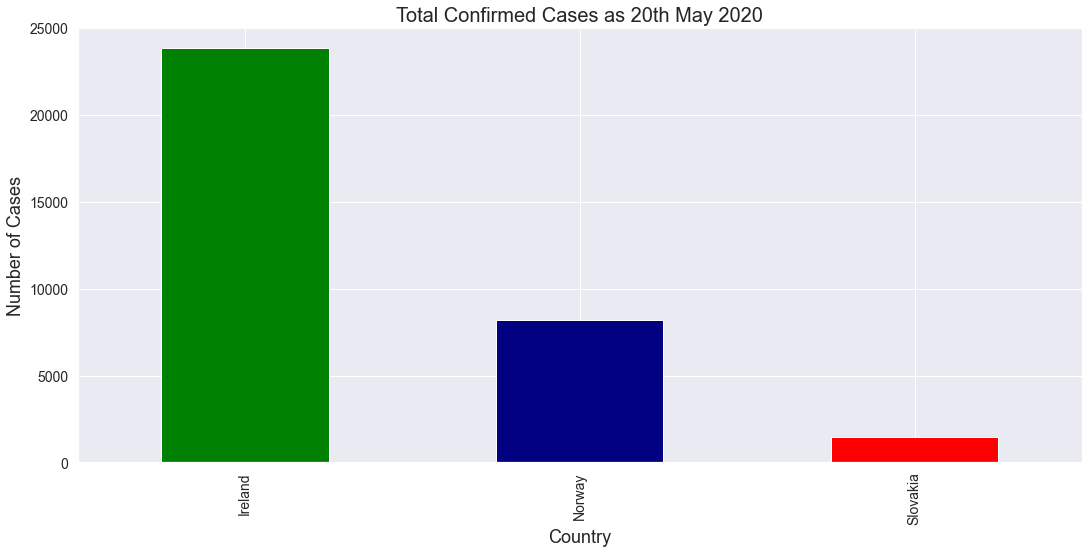

In [126]:
# import plotting library
import matplotlib.pyplot as plt

# create a bar chart to show the Total Confirmed cases as at 20th May 2020
df7.plot(x ='Country', y='TotalConfirmed', kind = 'bar', color=['green', 'navy', 'red'], legend=False, figsize=(18, 8))
plt.xlabel('Country', fontsize=18)
plt.ylabel('Number of Cases', fontsize=18)
plt.title('Total Confirmed Cases as 20th May 2020',fontsize=20)
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 
plt.show()

The bar chart above shows that Ireland has the greatest number of confirmed cases as at 20th May 2020.

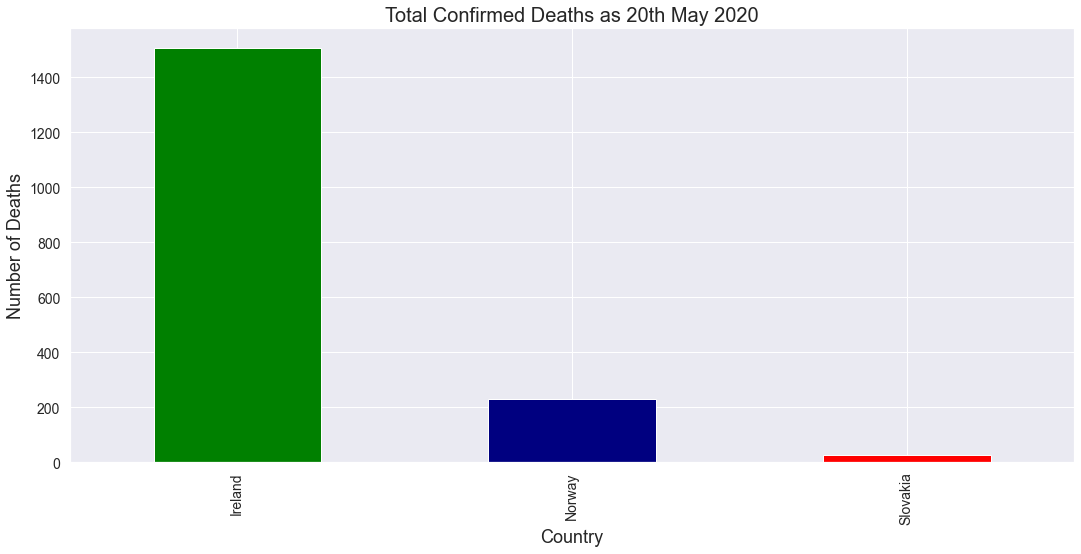

In [127]:
# create a bar chart to show the Toal Deaths as at 20th May 2020
df7.plot(x ='Country', y='TotalDeaths', kind = 'bar', color=['green', 'navy', 'red'], legend=False, figsize=(18, 8))
plt.xlabel('Country', fontsize=18)
plt.ylabel('Number of Deaths', fontsize=18)
plt.title('Total Confirmed Deaths as 20th May 2020',fontsize=20)
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 
plt.show()

The bar chart above shows that Ireland has the greatest number of deaths as at 20th May 2020. One reason for this could be how much testing is being carried out by each country.

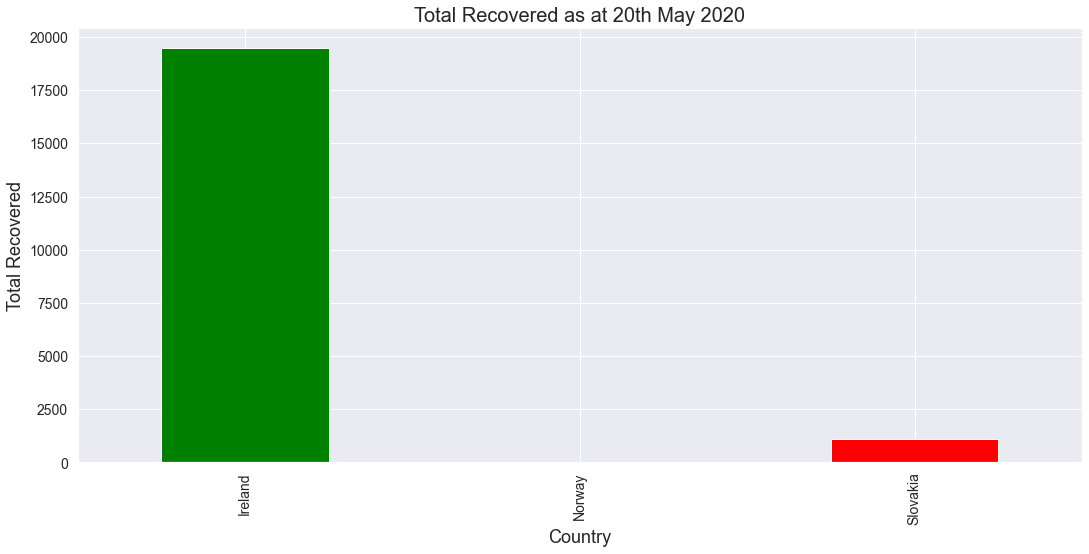

In [128]:
# create a bar chart to show the Toal Deaths as at 20th May 2020
df7.plot(x ='Country', y='TotalRecovered', kind = 'bar', color=['green', 'navy', 'red'], legend=False, figsize=(18, 8))
plt.xlabel('Country', fontsize=18)
plt.ylabel('Total Recovered', fontsize=18)
plt.title('Total Recovered as at 20th May 2020',fontsize=20)
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 
plt.show()

It appears from the bar chart above that Norway and Slovakia are not reporting on persons that have recovered from Covid-19.

In [107]:
# select all data from the covid_tests table where Country = Slovakia, Norway and Ireland
df10 = pd.read_sql_query("SELECT * FROM covid_tests WHERE Country = 'Slovakia' OR Country = 'Norway' OR Country = 'Ireland';", conn)
df10.tail()

,Country,Code,Date,Tests
109,Slovakia,SVK,2020-05-12 00:00:00,22.475
110,Slovakia,SVK,2020-05-13 00:00:00,23.268
111,Slovakia,SVK,2020-05-14 00:00:00,24.161
112,Slovakia,SVK,2020-05-15 00:00:00,24.892
113,Slovakia,SVK,2020-05-16 00:00:00,25.640


In [108]:
df10.dtypes

Country     object
Code        object
Date        object
Tests      float64
dtype: object

In [109]:
# change datatype of date to datetime
df10['Date'] = df10['Date'].astype('datetime64')
df10.head()

,Country,Code,Date,Tests
0,Ireland,IRL,2020-03-09,0.361
1,Ireland,IRL,2020-03-17,1.344
2,Ireland,IRL,2020-03-23,3.644
3,Ireland,IRL,2020-03-31,6.119
4,Ireland,IRL,2020-04-07,8.604


In [110]:
# show the number of tests per 1,000 people as at 12th May 2020
start_date = 'May 12, 2020'
tests = (df10['Date'] == start_date)
df11 = df10.loc[tests]
df11

,Country,Code,Date,Tests
9,Ireland,IRL,2020-05-12,52.414
59,Norway,NOR,2020-05-12,37.858
109,Slovakia,SVK,2020-05-12,22.475


It can be seen from the results in the table above that Ireland are testing a greater number of people at 52.414 per 1,000.

In [111]:
# return the first five rows of df5
df5.head()

,code,country,date,total_case,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million
0,IRL,Ireland,2019-12-31 00:00:00,0,0,0,0,0,0,0,0
1,IRL,Ireland,2020-01-01 00:00:00,0,0,0,0,0,0,0,0
2,IRL,Ireland,2020-02-01 00:00:00,0,0,0,0,0,0,0,0
3,IRL,Ireland,2020-03-01 00:00:00,0,0,0,0,0,0,0,0
4,IRL,Ireland,2020-04-01 00:00:00,0,0,0,0,0,0,0,0


In [112]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# change datatype of date to datetime
df5['date'] = pd.to_datetime(df5['date'])

# set the date as the index so I can plot graphs
df5 = df5.set_index('date')

# show the index of the dataframe
df5.index

DatetimeIndex(['2019-12-31', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01',
               ...
               '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24',
               '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28',
               '2020-04-29', '2020-04-30'],
              dtype='datetime64[ns]', name='date', length=296, freq=None)

In [114]:
# import seaborn
import seaborn as sns

# set the figure size of the plot
sns.set(rc={'figure.figsize':(12, 8)})

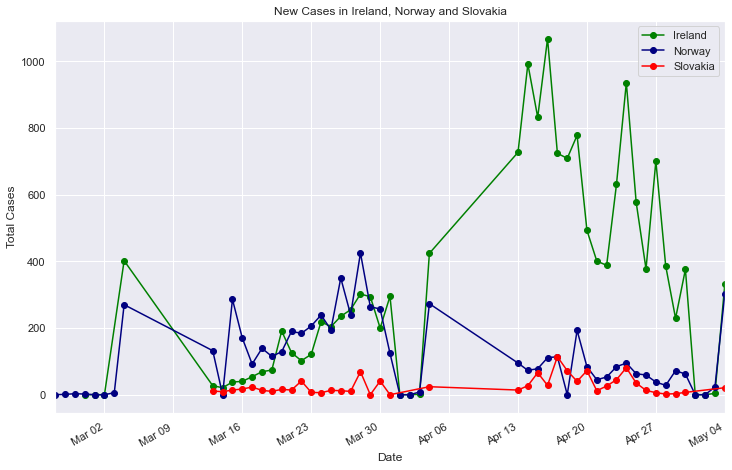

In [115]:
df5_ireland = df5[(df5["country"]=="Ireland")]
df5_norway = df5[(df5["country"]=="Norway")]
df5_slovakia = df5[(df5["country"]=="Slovakia")]

# plot a line graph showing the new cases reported in Ireland per day
ax = df5_ireland.loc['2020-02-29':'2020-05-15', 'new_cases'].plot(marker='o', linestyle='-', color='green', label='Ireland')

# plot a line graph showing the new cases reported in Norway per day
ax = df5_norway.loc['2020-02-26':'2020-05-15', 'new_cases'].plot(marker='o', linestyle='-', color='navy', label='Norway')

# plot a line graph showing the new cases reported in Slovakia per day
ax = df5_slovakia.loc['2020-03-06':'2020-05-15', 'new_cases'].plot(marker='o', linestyle='-', color='red', label='Slovakia')

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

# set the y axis heading
ax.set_ylabel('Total Cases')

# set the y axis heading
ax.set_xlabel('Date')

# set the title
ax.set_title('New Cases in Ireland, Norway and Slovakia')

# set legend
plt.legend(loc="upper right")

The line chart above shows the new cases each day by country. It can be seen that Ireland's cases peaked in April and then started to decline. Norway peaked towards the end of March and are steadily falling. Slovakia's cases didn't peak and were kept very low showing they kept the virus under control.

In [116]:
# show the first 5 rows of the dataframe
df7.head()

,Country,TotalConfirmed,TotalDeaths,TotalRecovered,Date,Population
0,Ireland,23827,1506,19470,2020-05-15,4921500
1,Norway,8196,232,32,2020-05-15,5323933
2,Slovakia,1477,27,1112,2020-05-15,5445087


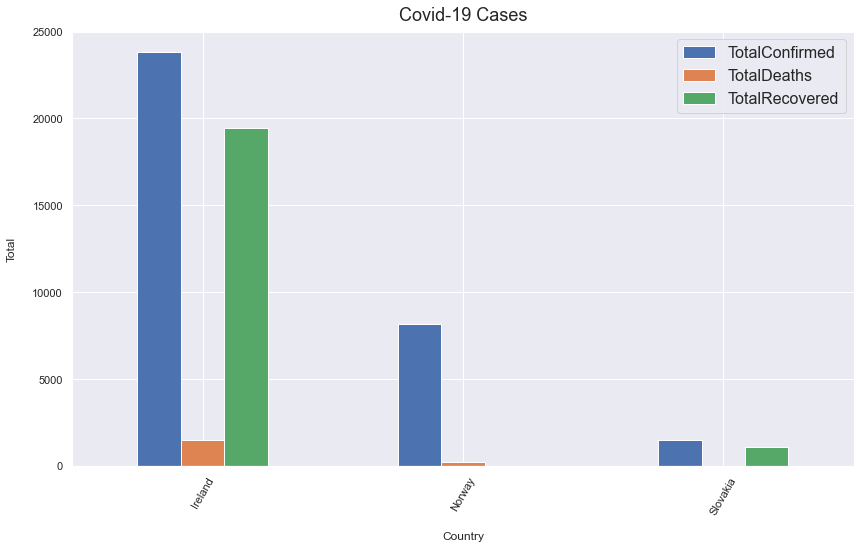

In [120]:
# create a bar chart to show confirmed cases, total deaths and total recovered for each country
df7.set_index('Country')[['TotalConfirmed', 'TotalDeaths', 'TotalRecovered']].plot(kind='bar', figsize=(14, 8))

# rotate ticks on the x-axis
plt.xticks(rotation=60)

# set title
plt.title("Covid-19 Cases", fontsize=18, y=1.01)

# set x-axis label
plt.xlabel("Country", labelpad=15)

# set y-axis label
plt.ylabel("Total", labelpad=15)

# create a legend
plt.legend(["TotalConfirmed", "TotalDeaths", "TotalRecovered"], fontsize=16)

It can be seen from the bar chart above that Ireland has the most cases, deaths and recovered persons. But how accurate is the data? Ireland are testing more than Norway and Slovakia so this could be the reason for more cases. Ireland are reporting deaths in care homes and have also reported on the number of recovered persons.

The difficulty with analysing the covid-19 data is that each country started lockdowns at different times, the lockdowns were different, some countries are reporting covid-19 deaths in care homes whereas others are not and testing is being carried out at different rates.

So eventhough Ireland, Norway and Slovakia have similar sized populations an accurate analysis can not be carried out.

According to wikepedia lockdown restrictions commenced on the 12th March 2020 in Norway, in Slovakia on the 8th March 2020 and in Ireland on the 13th March 2020. Slovakia were said to have the strictest covid-19 restrictions in Europe - is this why cases and deaths there are so low? or is the lack of testing keeping the reported figures lower than other countries.

### References

- https://pandas.pydata.org/
- https://matplotlib.org/
- https://www.python.org/
- https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Norway
- https://en.wikipedia.org/wiki/COVID-19_pandemic_in_the_Republic_of_Ireland
- https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Slovakia
- https://ourworldindata.org

### End